**Este notebook apresenta um tutorial para a criação de gráfico de barras empilhadas utilizando Python, conforme o exemplo abaixo. Diferentes palestas de cores acessíveis para daltônicos são utilizadas.**

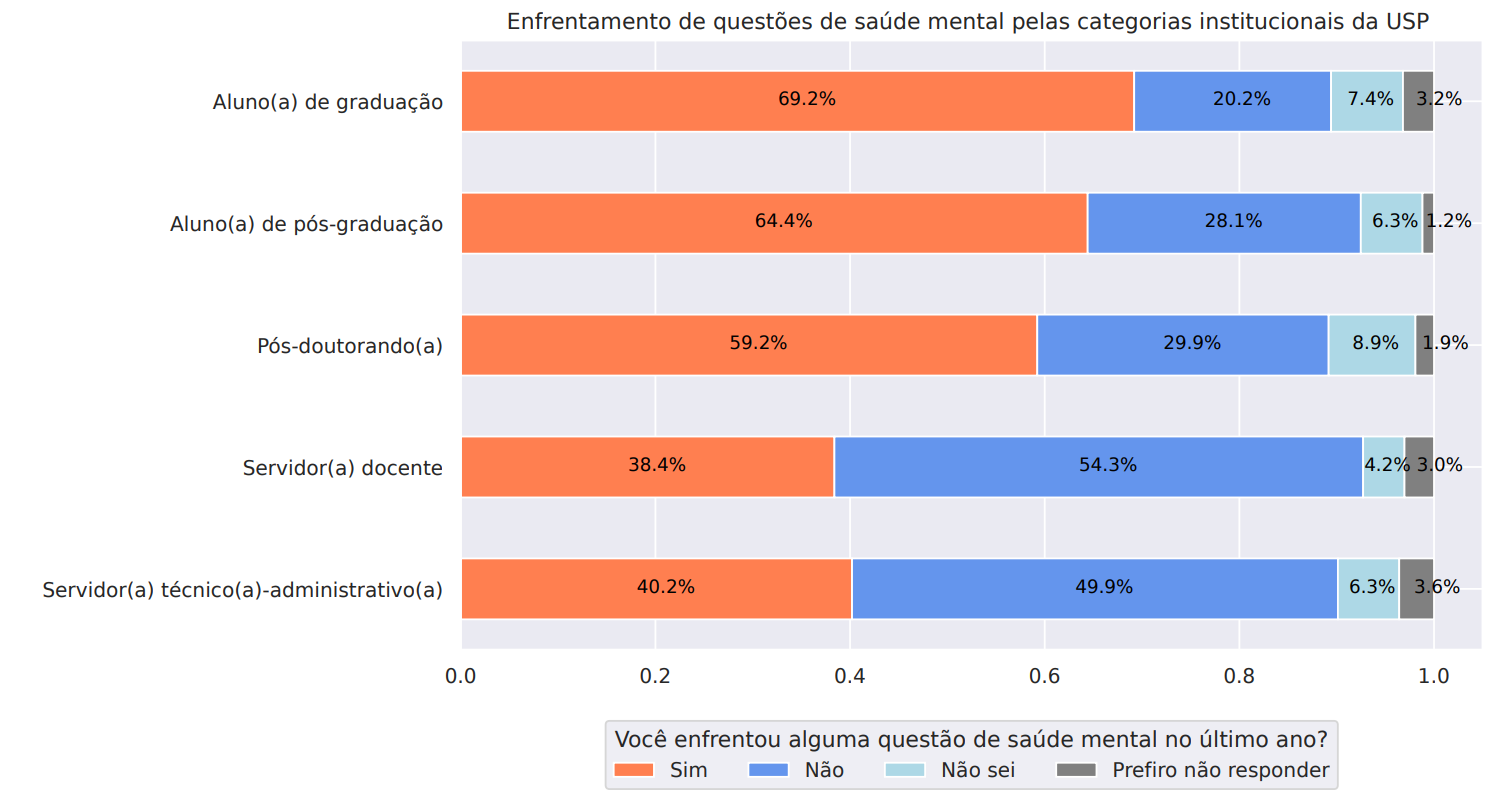

**Figura 5.2.2: Distribuição do enfrentamento de questões de saúde mental pelas categorias institucionais da USP (QPRIP, 2024).**



> Veja  mais sobre acessibilidade cromática para daltonismo: https://repositorio.ufsm.br/bitstream/handle/1/24809/guia-modo-padr%C3%A3o.pdf?sequence=3&isAllowed=y





---



**Passo 1: Preparar os dados**

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar base de dados
df = pd.read_csv('exemplos_QPRIP.csv')

In [3]:
# Este tipo de gráfico precisa, por exemplo, da posição institucional do respondente
# Para manter o anonimato, esses dados são sintéticos, ou seja, falsos

# Posições institucionais pré-definidas
posicoes = [
            'Aluno(a) de graduação',
            'Aluno(a) de pós-graduação',
            'Pós-doutorando(a)',
            'Servidor(a) docente',
            'Servidor(a) técnico(a)-administrativo(a)'
            ]

# Atribui uma posição aleatória para cada registro
df['Qual a sua posição principal na USP hoje?'] = np.random.choice(posicoes, size=len(df))

In [4]:
# Definir variáveis alvos
variavel_alvo_1 = 'Qual a sua posição principal na USP hoje?'
variavel_alvo_2 = 'Você enfrentou alguma questão de saúde mental no último ano?'

# Definir ordem dos valores no grafico
ordem_grafico = ['Sim', 'Não', 'Não sei', 'Prefiro não responder']

# Definir título e legenda do gráfico
titulo_grafico = 'Enfrentamento de questões de saúde mental pelas categorias institucionais da USP'
legenda_grafico = 'Você enfrentou alguma questão de saúde mental no último ano?'

---

**Passo 2: Criação da tabela cruzada**

In [5]:
# Proporções por posição institucional
tabela_cruzada = pd.crosstab(df[variavel_alvo_1], df[variavel_alvo_2], normalize = 'index')
tabela_cruzada = tabela_cruzada.reindex(columns = ordem_grafico)
tabela_cruzada

Você enfrentou alguma questão de saúde mental no último ano?,Sim,Não,Não sei,Prefiro não responder
Qual a sua posição principal na USP hoje?,,,,
Aluno(a) de graduação,0.652174,0.271739,0.032609,0.043478
Aluno(a) de pós-graduação,0.688679,0.254717,0.047170,0.009434
Pós-doutorando(a),0.594059,0.316832,0.059406,0.029703
Servidor(a) docente,0.648148,0.250000,0.083333,0.018519
Servidor(a) técnico(a)-administrativo(a),0.677419,0.258065,0.053763,0.010753




---



**Parte 3: Gerar gráfico de barras 100% empilhadas**

In [6]:
def plotar_grafico_barras_empilhadas_percentual(tabela_cruzada, titulo_grafico, legenda_grafico, paleta_cores):
    """
    Plota um gráfico de barras horizontais empilhadas com porcentagens e salva como PDF.

    Parâmetros:
    - tabela_cruzada: DataFrame com os dados (em formato de tabela cruzada).
    - titulo_grafico: string com o título do gráfico.
    - legenda_grafico: string com o título da legenda.
    - paleta_cores: cores das barrinhas.
    """
    sns.set_theme(style="darkgrid") # Estilo do gráfico com fundo grade escura

    mpl.rcParams['pdf.fonttype'] = 42 # Fonte vetorial para PDF

    plt.figure(figsize=(8, 6)) # Tamanho da figura

    # Gera gráfico
    ax = tabela_cruzada.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=paleta_cores)

    plt.ylabel('')
    plt.xlabel('')
    plt.title(titulo_grafico)

    # Inverte ordem das categorias no eixo y
    ax.invert_yaxis()

    # Adiciona legenda
    plt.legend(title=legenda_grafico, bbox_to_anchor=(0.5, -0.10), loc='upper center', ncol=4)

    # Adiciona valores percentuais dentro das barras
    kx = -0.02
    ky = 0.03
    values = []
    for key in tabela_cruzada.columns:
        values += list(tabela_cruzada[key])

    for i, rec in enumerate(ax.patches):
        if i > 14:
            kx = -0.0025
        cor = 'black'  # Mantido sempre preto neste caso
        ax.text(rec.get_x() + rec.get_width() / 2 + kx,
                rec.get_y() + rec.get_height() / 2 + ky,
                '{:.1%}'.format(values[i]),
                fontsize=10, color=cor)

    return plt

<Figure size 800x600 with 0 Axes>

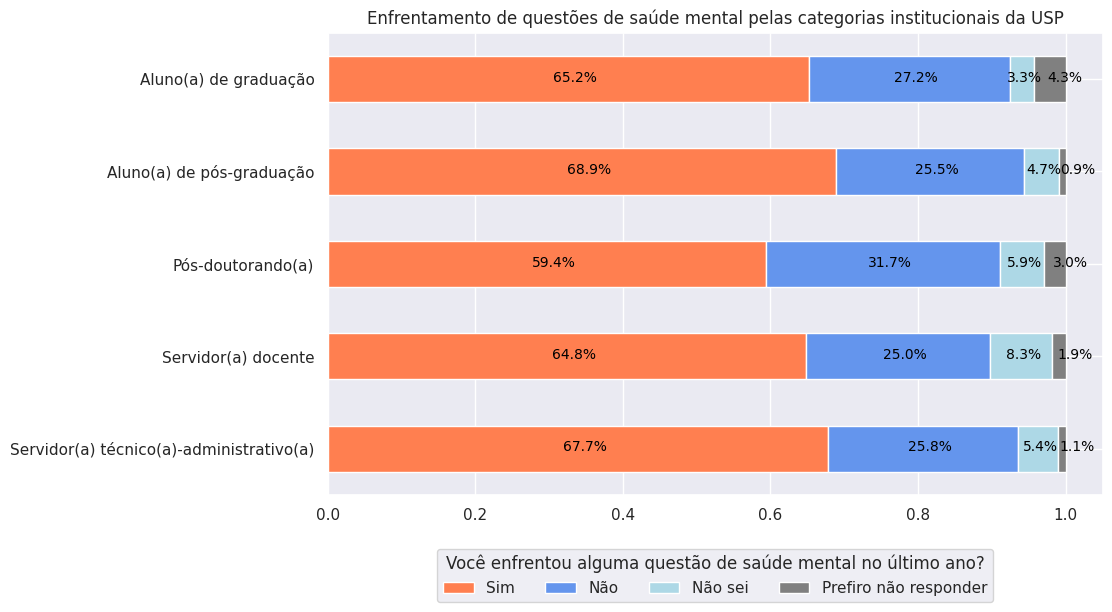

In [7]:
# Definir paleta de cores
paleta_cores = plt.cm.colors.ListedColormap(['coral', 'cornflowerblue', 'lightblue', 'gray'])

# Chamar a função
fig = plotar_grafico_barras_empilhadas_percentual(tabela_cruzada, titulo_grafico, legenda_grafico, paleta_cores)

# Salvar em pdf acessível para leitores de telas
fig.savefig('enfrentamento_saude_mental.pdf', bbox_inches='tight', dpi=300)

<Figure size 800x600 with 0 Axes>

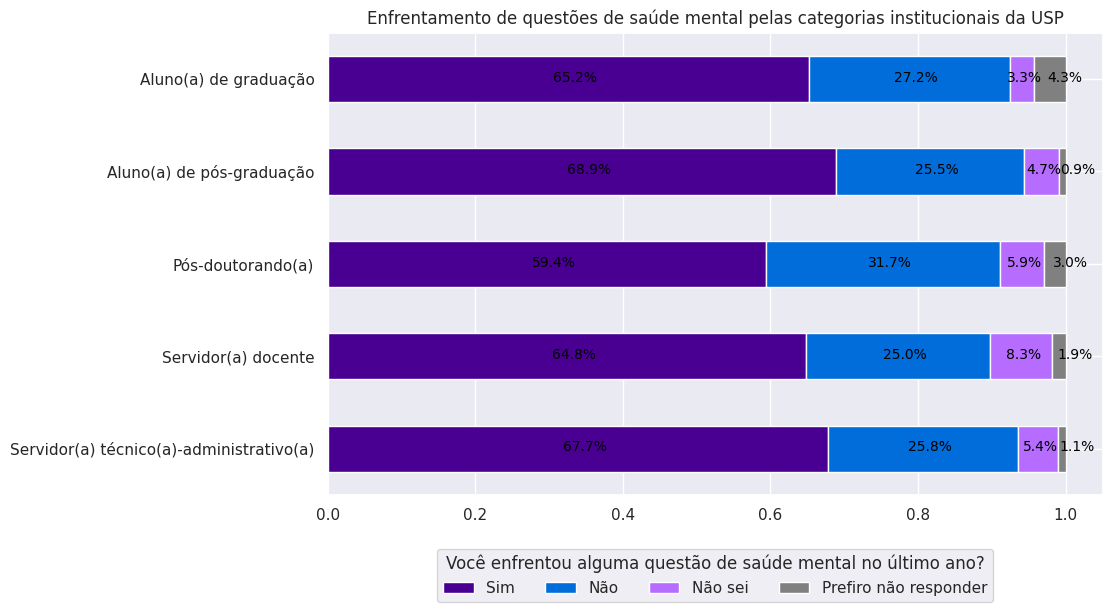

In [8]:
# Definir paleta de cores
paleta_cores = plt.cm.colors.ListedColormap(["#490092", "#006ddb", "#b66dff", 'gray'])

# Chamar a função
fig = plotar_grafico_barras_empilhadas_percentual(tabela_cruzada, titulo_grafico, legenda_grafico, paleta_cores)

<Figure size 800x600 with 0 Axes>

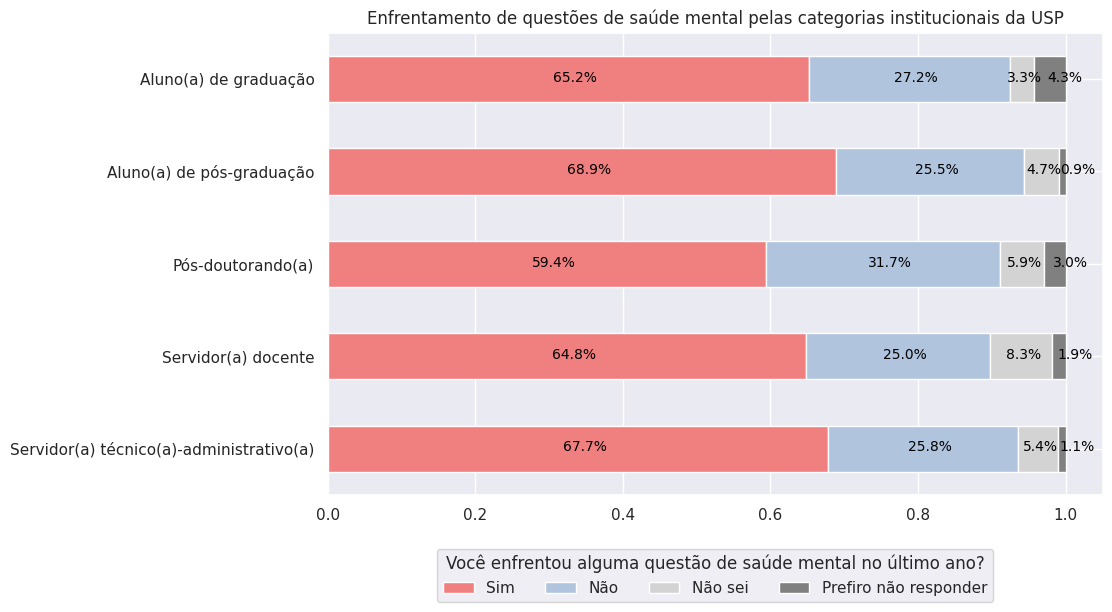

In [9]:
# Definir paleta de cores
paleta_cores = plt.cm.colors.ListedColormap(['lightcoral', 'lightsteelblue', 'lightgrey', 'gray'])

# Chamar a função
fig = plotar_grafico_barras_empilhadas_percentual(tabela_cruzada, titulo_grafico, legenda_grafico, paleta_cores)